In [1]:
import numpy as np
import pandas as pd 
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os, cv2, itertools
import matplotlib.pyplot as plt 
%matplotlib inline

Using TensorFlow backend.


In [3]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


In [0]:
plate_number_dir =  '/gdrive/My Drive/Colab Notebooks/Plate-Number-Classification/plate_number/' #'./plate_numbers/'
negative_images_dir = '/gdrive/My Drive/Colab Notebooks/Plate-Number-Classification/negative_images/' #'./negative_images/'
ROWS = 64
COLS = 64
CHANNELS = 3

In [0]:
plate_numbers_img = [plate_number_dir+i for i in os.listdir(plate_number_dir)]
negative_images_img = [negative_images_dir+i for i in os.listdir(negative_images_dir)]

In [0]:
def read_image(file_path):
    img = cv2.imread(file_path, cv2.IMREAD_COLOR)
    resized_img = cv2.resize(img, (ROWS, COLS), interpolation = cv2.INTER_AREA)
    return resized_img

In [0]:
def prep_data(images):
  m = len(images)
  n_x = ROWS*COLS*CHANNELS
  
  X = np.ndarray((n_x,m), dtype = np.uint8)
  y = np.zeros((1,m))
  print("X.shape is {}".format(X.shape))
  
  for i,image_file in enumerate(images):
    image = read_image(image_file)
    X[:,i] = np.squeeze(image.reshape((n_x,1)))
    if '-' in image_file.lower() :
      y[0,i] = 1
    elif 'image' in image_file.lower() :
      y[0,i] = 0
    else : # for test data
      y[0,i] = image_file.split('/')[-1].split('.')[0]
      
    if i%5000 == 0 :
      print("Proceed {} of {}".format(i, m))
    
  return X,y

In [47]:
X_img, y_img = prep_data(plate_numbers_img + negative_images_img)

X.shape is (12288, 259)
Proceed 0 of 259


In [0]:
classes = {0: 'Negative_Image',         
          1: 'Plate_Number'}

In [0]:
def show_images(X, y, idx) :
  image = X[idx]
  image = image.reshape((ROWS, COLS, CHANNELS))
  plt.figure(figsize=(4,2))
  plt.imshow(image)
  plt.title("This is a {}".format(classes[y[idx,0]]))
  plt.show()

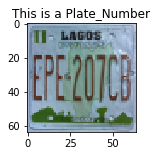

In [52]:
show_images(X_img.T, y_img.T, 0)

In [0]:
def show_image_prediction(X, idx, model) :
    image = X[idx].reshape(1,-1)
    image_class = classes[model.predict(image).item()]
    image = image.reshape((ROWS, COLS, CHANNELS))
    plt.figure(figsize = (4,2))
    plt.imshow(image)
    plt.title("Test {} : Right here is a {}".format(idx, image_class))
    
    plt.show()

In [66]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn.fit(plate_img_lr, neg_img_lr)

print("Model accuracy: {:.2f}%".format(knn.score(plate_img_lr, neg_img_lr)*100))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


Model accuracy: 100.00%


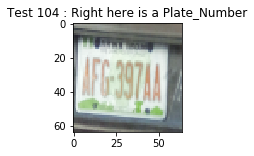

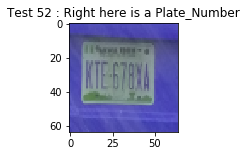

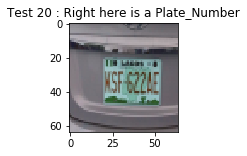

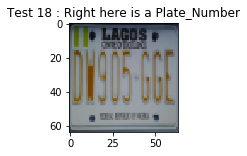

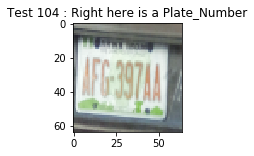

In [75]:
plate_img_lr, neg_img_lr = plate_img.T, negative_img.T

for i in np.random.randint(0, len(plate_img_lr), 5) :
    show_image_prediction(plate_img_lr, i, knn)

In [68]:
plate_img_lr, neg_img_lr = plate_img.T, negative_img.T

for i in np.random.randint(0, len(plate_img_lr), 5) :
    show_image_prediction(plate_img_lr, i, clf)

NotFittedError: ignored

In [69]:
from sklearn.neighbors import RadiusNeighborsClassifier

rnc = RadiusNeighborsClassifier()
rnc.fit(plate_img_lr, neg_img_lr)

print("Model accuracy: {:.2f}%".format(rnc.score(plate_img_lr, neg_img_lr)*100))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


Model accuracy: 100.00%


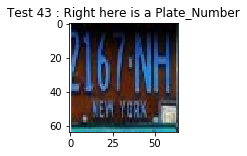

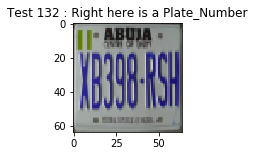

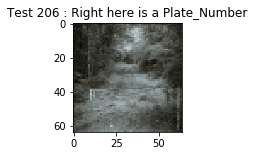

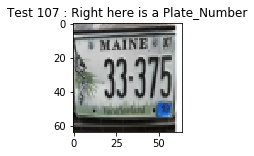

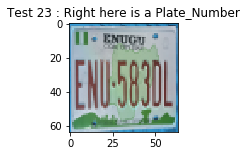

In [71]:
plate_img_lr, neg_img_lr = plate_img.T, negative_img.T

for i in np.random.randint(0, len(plate_img_lr), 5) :
    show_image_prediction(plate_img_lr, i, rnc)

In [62]:
from sklearn.linear_model import LogisticRegressionCV

clf = LogisticRegressionCV()

X_img_lr, y_img_lr = X_img.T, y_img.T.ravel()

clf.fit(X_img_lr,y_img_lr)

print("Model accuracy: {:.2f}%".format(clf.score(X_img_lr, y_img_lr)*100))

def show_image_prediction(X, idx, model) :
  image = X[idx].reshape(1,-1)
  image_class = classes[model.predict(image).item()]
  image = image.reshape((ROWS, COLS, CHANNELS))
  plt.figure(figsize = (4,2))
  plt.imshow(image)
  plt.title("Test {} : I think this is a {}".format(idx, image_class))
  plt.show()
  
X_img_lr, y_img_lr = X_img.T, y_img.T

for i in np.random.randint(0, len(X_img_lr), 10) :
  show_image_prediction(X_img_lr, i, clf)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


ValueError: ignored